In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

# Download + unzip

In [2]:
%cd /content
!rm -rf sample_data

/content


In [3]:
!gdown 1NxXjn59w8GZeGPWnu9xTcAOb0i6qPsJf
!unzip -q /content/Cranfield.zip

Downloading...
From: https://drive.google.com/uc?id=1NxXjn59w8GZeGPWnu9xTcAOb0i6qPsJf
To: /content/Cranfield.zip
100% 851k/851k [00:00<00:00, 96.1MB/s]


In [4]:
!gdown 1RJnkTc2QnoWOsX98_szykR8bGaFWYfu9
!unzip -q /content/TEST.zip -d TEST

Downloading...
From: https://drive.google.com/uc?id=1RJnkTc2QnoWOsX98_szykR8bGaFWYfu9
To: /content/TEST.zip
100% 49.9k/49.9k [00:00<00:00, 7.38MB/s]


In [5]:
# xuất file trống
!echo Empty files:
!find ./Cranfield -type f -empty -print

Empty files:
./Cranfield/471.txt
./Cranfield/995.txt


# **Library**

In [6]:
!pip install ipython-autotime
%load_ext autotime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 16.8 MB/s eta 0:00:00
time: 912 µs (started: 2023-03-01 13:30:33 +00:00)


In [7]:
import numpy as np
import pandas as pd
from math import *
import re
import os
import matplotlib.pyplot as plt 
%matplotlib inline
import nltk
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('omw-1.4')

from nltk.stem import PorterStemmer  
from nltk.tokenize import word_tokenize 
from tqdm import tqdm
from collections import Counter
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_list = stopwords.words('english')
stop_list.append('must')
nltk.download('punkt')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

time: 4.27 s (started: 2023-03-01 13:30:33 +00:00)


#Preprocessing

In [70]:
'''
    Hàm dùng RegEx và chọn những term có độ dài > 2
'''
pattern = '[a-z]+'
def tokenize(text):
    text = text.lower()
    token = re.findall(pattern,text)
    clean_token = [i for i in token if (i not in stop_list) and len(i) > 2]

    # stemming
    ps = PorterStemmer()
    stemming = [ps.stem(i) for i in clean_token]
    return stemming

    # # lemmatization
    # lemmatizer = WordNetLemmatizer()
    # lemma = [lemmatizer.lemmatize(i) for i in clean_token]
    # return lemma

time: 2.49 ms (started: 2023-03-01 13:40:28 +00:00)


In [71]:
# %cd /content/drive/MyDrive/Information Retrieval/dataset/

time: 741 µs (started: 2023-03-01 13:40:30 +00:00)


## Đọc file

In [72]:
num_doc = len(os.listdir('./Cranfield'))
dict_ = []
for i in tqdm(os.listdir('./Cranfield')):
# for i in ['1.txt', '2.txt', '3.txt']:
    text =  open('./Cranfield/' + i).read()[:-1]
        # print(shortword)
    text_tokenize = tokenize(text)
    
    doc = int(i.replace('.txt',''))
    # print(doc, ' '.join(text_tokenize))
    counter =  Counter(text_tokenize)
    
    for term, freq in counter.items():
        dict_.append({'term': term, 'document': doc, 'total freq':freq})

100%|██████████| 1400/1400 [00:05<00:00, 246.06it/s]

time: 5.7 s (started: 2023-03-01 13:40:30 +00:00)


In [73]:
query_list = open('./TEST/query.txt', 'r').read().split('\n')[:-1]

time: 4.97 ms (started: 2023-03-01 13:40:35 +00:00)


In [74]:
# đọc các file RES 
res_dict = {}
res_len = len(os.listdir('./TEST/RES'))
for i in tqdm(os.listdir('./TEST/RES')):
    res_list =  open('./TEST/RES/' + i).read().split('\n')[:-1]
    # print(re.findall('\d+',i)[0])
    res_dict[ int(i.replace('.txt', '')) ]= {'true doc' : (tuple(map(int,[re.findall('\d+',line)[1] for line in res_list ])))}


100%|██████████| 225/225 [00:00<00:00, 9018.37it/s]

time: 35.3 ms (started: 2023-03-01 13:40:35 +00:00)


##Stat

In [75]:
df = pd.DataFrame(dict_,).sort_values(by = 'term',ignore_index =True)

time: 513 ms (started: 2023-03-01 13:40:36 +00:00)


In [76]:
df1 = df[['term', 'document']].groupby('term',as_index = False).count() # thống kê số doc/term 
df2 = df[['term', 'total freq']].groupby('term',as_index = False).sum() # thống kê tần số/term 
stat_table = df1.merge(df2)
stat_table = stat_table.rename(columns = {'document': 'no document'});

time: 178 ms (started: 2023-03-01 13:40:36 +00:00)


In [77]:
stat_table.sort_values(by = 'total freq', ascending = False, ignore_index =True).head(20).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
term,flow,pressur,number,boundari,layer,result,effect,method,theori,bodi,solut,heat,wing,mach,equat,shock,use,present,surfac,distribut
no document,730,552,571,470,414,692,541,455,456,293,407,306,226,388,401,240,514,507,330,361
total freq,2083,1391,1348,1216,1164,1088,998,888,883,854,849,847,838,823,778,746,734,698,691,650


time: 43.9 ms (started: 2023-03-01 13:40:36 +00:00)


In [78]:
stat_table.sort_values(by = 'no document', ascending = False, ignore_index =True).head(20).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
term,flow,result,number,pressur,effect,use,present,boundari,obtain,theori,method,two,layer,solut,equat,mach,given,approxim,case,investig
no document,730,692,571,552,541,514,507,470,464,456,455,432,414,407,401,388,387,377,365,361
total freq,2083,1088,1348,1391,998,734,698,1216,643,883,888,639,1164,849,778,823,521,555,547,524


time: 52.3 ms (started: 2023-03-01 13:40:36 +00:00)


In [79]:
frequency_lst = stat_table['total freq'].to_numpy()
group_freq = np.zeros(5)

for i in stat_table['total freq']:
  if i <= 20:
    group_freq[0] += 1
  elif 20 < i <= 40:
    group_freq[1] += 1
  elif 40 < i <= 100:
    group_freq[2] += 1
  elif 100 < i <= 1000:
    group_freq[3] += 1
  else:
    group_freq[4] += 1

time: 8.09 ms (started: 2023-03-01 13:40:36 +00:00)


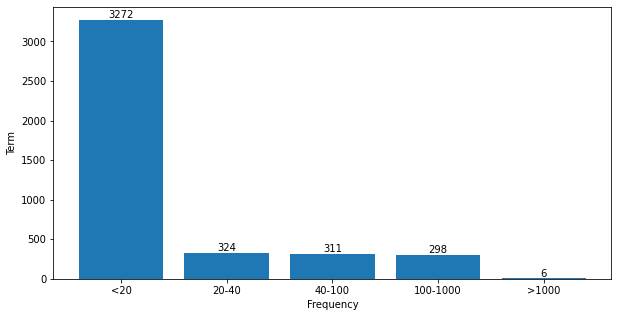

time: 295 ms (started: 2023-03-01 13:40:36 +00:00)


In [80]:
x_label = ['<20', '20-40', '40-100', '100-1000', '>1000']
fig, ax = plt.subplots(figsize=(10, 5))

ax.bar(x_label, group_freq)
plt.xlabel('Frequency')
plt.ylabel('Term')
# plt.bar_label(group_freq)
for i in range(len(group_freq)):
    plt.annotate(int(group_freq[i]), xy=(x_label[i],group_freq[i]), ha='center', va='bottom')
plt.show()

In [81]:
stat_table.describe()

,no document,total freq
count,4211.000000,4211.000000
mean,19.729280,30.339587
std,52.149642,96.095742
min,1.000000,1.000000
25%,1.000000,1.000000
50%,3.000000,3.000000
75%,12.000000,16.000000
max,730.000000,2083.000000


time: 23.1 ms (started: 2023-03-01 13:40:37 +00:00)


# Chọn term

In [82]:
thres1 = 0
thres2 = 3000
df_choose = stat_table[(stat_table['total freq'] > thres1) & (stat_table['total freq'] < thres2) ]
print(len(df_choose))

4211
time: 12.8 ms (started: 2023-03-01 13:40:37 +00:00)


#Vector space model

## Lập chỉ mục

In [21]:
# posting = {}
posting = df_choose.set_index('term').to_dict('index')
for term, doc, freq in df.values:
    # print(term, doc, freq)
    if term in posting.keys():
        if 'document' not in posting[term]:
            posting[term]['document'] = {}
        posting[term]['document'][doc] =  freq
    # if term not in posting.keys():
    #     posting[term] = {}
    # if  not in forward_index.keys():
    #     forward_index[] = set()
    # forward_index[].add(term)
    # posting[term][] = {'freq': value[2], 'w': 0.0}

time: 180 ms (started: 2023-03-01 13:30:44 +00:00)


## Chuẩn hóa

In [22]:
doc_sum = { _ : 0 for _ in range(1,num_doc + 1)}
for term, value in posting.items():

    idf  = log(num_doc/value['no document'], 10)
    posting[term]['idf']  = idf
    for doc, freq in posting[term]['document'].items():
        posting[term]['document'][doc] = freq * idf
        doc_sum[doc] += (freq * idf) ** 2

time: 54.9 ms (started: 2023-03-01 13:30:44 +00:00)


In [23]:
for term, value in posting.items():
   for doc, weight in value['document'].items():
       posting[term]['document'][doc]= weight / sqrt(doc_sum[doc])

time: 39.7 ms (started: 2023-03-01 13:30:44 +00:00)


##Truy vấn

In [24]:
result = {}
for query in query_list:

    line, text = tuple(query.split('\t'))

    query_tokenize = tokenize(text)

    counter =  Counter(query_tokenize)

    # query_inter = set(posting.keys()) & set(counter.keys())
    
    
    rank = {}
    # query_sum = 0
    # doc_sum_query = {} # tinhs tong weight nhung doc co tron query
    for term, freq in counter.items():
        if term in posting:
            tf_idf = freq * posting[term]['idf']
            # query_sum = (tf_idf := counter[term] * posting[term]['idf']) ** 2
            for doc, weight in posting[term]['document'].items():
                if doc not in rank:
                    # rank[doc], doc_sum_query[doc] = weight * tf_idf, weight ** 2
                    rank[doc] = weight * tf_idf
                else:
                    rank[doc] +=  weight * tf_idf
                    # doc_sum_query[doc] += weight ** 2
                    

    # rank = { _ : value / (sqrt(doc_sum_query[_] * query_sum)) for _ , value in rank.items()}
    
    result[int(line)] = sorted(rank.items(), key=lambda item: item[1], reverse=True)

time: 402 ms (started: 2023-03-01 13:30:44 +00:00)


##MAP không nội suy

In [25]:

# res là tài liệu liên quan, doc là tài liệu trả về (dict)
def precision_recall(doc_true, doc_predict):
    count = 0
    # i là biến chạy từ 
    i = 0
    p_r= []
    for d, cos in doc_predict:
        # print(d)
        if d in doc_true:
            count += 1
            p = count / (i + 1)
            r = count / len(doc_true)
            p_r.append([p, r])
        i += 1
    return p_r

time: 1.6 ms (started: 2023-03-01 13:30:45 +00:00)


In [26]:
# lưu 225 query: {số doc đúng, số doc trả về, số doc trả về ĐÚNG}
doc_len = {}
avr = 0
precision_recall_res = {}
for idx, value in res_dict.items():
    # res['res'] là query index [1-225]
    precision_recall_res[idx] = precision_recall(value['true doc'], result[idx])
   
    doc_len[idx] = {}
    doc_len[idx]['true_doc'] = len(value['true doc'])
    doc_len[idx]['return_doc'] = len(result[idx])
    doc_len[idx]['true_return_doc'] = len(precision_recall_res[idx])
    avr += len(result[idx])
avr /= 225

time: 70.4 ms (started: 2023-03-01 13:30:45 +00:00)


In [27]:
print(f'Trung bình 1 câu query trả về {avr} doc')

Trung bình 1 câu query trả về 786.1288888888889 doc
time: 3.65 ms (started: 2023-03-01 13:30:45 +00:00)


In [28]:
AP = []
for id, values in precision_recall_res.items():
    try:
        sum_p_r = np.array(values).sum(axis = 0)[0]
        AP.append(sum_p_r / len(values))
    except:
        AP.append(0)
        
sum(AP) / res_len

0.388245842577849

time: 8.86 ms (started: 2023-03-01 13:30:45 +00:00)


##MAP nội suy theo 11 điểm của TREC
---
Nội suy tại các điểm phủ 0%, 10%, 20%, 30%, 40%, 50%, 60%, 70%, 80%, 90%, 100%)

In [29]:
def interpolated_mAP(p_r):
    temp = []
    for i in np.arange(0, 1.1, 0.1):
        max_pre = 0
        for pre_recall in p_r:
            if pre_recall[1] >= i and pre_recall[0] > max_pre:
                max_pre = pre_recall[0]
        temp.append(max_pre)

    return sum(temp) / 11

time: 1.6 ms (started: 2023-03-01 13:30:45 +00:00)


In [30]:
AP_r = []
for res in res_dict.keys():
    AP_r.append(interpolated_mAP(precision_recall_res[res]))
    
print('mAP nội suy:', sum(AP_r)/len(AP_r))

mAP nội suy: 0.3901556316416678
time: 13.3 ms (started: 2023-03-01 13:30:45 +00:00)


## Precision, recall

In [31]:
sum_p, sum_r = 0, 0
for i in doc_len:
    sum_p += doc_len[i]['true_return_doc'] / doc_len[i]['return_doc']
    sum_r += doc_len[i]['true_return_doc'] / doc_len[i]['true_doc']
    
average_p, average_r = sum_p / len(doc_len), sum_r / len(doc_len)

print('Trung bình precision: ', average_p)

print('Trung bình recall: ', average_r)

Trung bình precision:  0.010899849654223462
Trung bình recall:  0.9447963109136871
time: 3.92 ms (started: 2023-03-01 13:30:45 +00:00)


In [32]:
# 0.010640061116621595
# Trung bình recall:  0.9576959857236399

time: 674 µs (started: 2023-03-01 13:30:45 +00:00)


#Language model: Unigram

## Lập chỉ mục LM

In [33]:
query_list[0]

'1\twhat similarity laws must be obeyed when constructing aeroelastic models of heated high speed aircraft .'

time: 8.98 ms (started: 2023-03-01 13:30:45 +00:00)


In [34]:
dddd = df[df['term'] == 'speed']
dddd[dddd['document'] == 5]


,term,document,total freq


time: 44.3 ms (started: 2023-03-01 13:30:45 +00:00)


In [35]:
posting_lg = {_ : {} for _ in df_choose['term'].values}
doc_list = {_:0 for _ in range(1,num_doc + 1)}
for term, doc, freq in df.values:
    if term in posting_lg.keys():
        # if doc not in posting[term]:
        posting_lg[term][doc] = freq
        if doc not in doc_list:
            doc_list[doc] = freq
        else:
            doc_list[doc] += freq

# for term, docs in posting_lg.items():
#     posting_lg[term] = {doc: (freq + 1) / (doc_list[doc] + len(posting_lg.keys())) for doc, freq in docs.items()}
#     for i in range(1,num_doc + 1):
#         if i not in posting_lg[term].keys():
#             posting_lg[term][i] = 1 / (doc_list[i] + len(posting_lg.keys()))

# for term , docs in posting_lg.items():
#     for doc in docs:
#         posting_lg[term][doc]['total freq'] = doc_list[doc]

time: 203 ms (started: 2023-03-01 13:30:45 +00:00)


##Truy vấn

In [36]:
result_lg = {}
for query in query_list:

    line, text = tuple(query.split('\t'))

    query_tokenize = tokenize(text)

    counter =  Counter(query_tokenize)

    # query_inter = set(posting.keys()) & set(counter.keys())
    rank = {}
    t = 1
    # print(counter)
    for term, freq in counter.items():
        if term in posting_lg:
            for doc, weight in posting_lg[term].items():
                if doc not in rank:
                    rank[doc] = (weight + 1) **freq/(doc_list[doc]+ len(posting_lg.keys()))**sum(counter.values() )
                else:
                    rank[doc] *=  (weight + 1)**freq
                
    
    result_lg[int(line)] = sorted(rank.items(), key=lambda item: item[1], reverse=True)

time: 671 ms (started: 2023-03-01 13:30:45 +00:00)


In [37]:
# # tạo dict lưu xác suất của doc
# def create_doc_prob(query_sentence, len_v, len_q, smooth=True):
#     doc_prob = {}
#     for query_word in query_sentence.keys():
#         if query_word in posting_lg:
#             doc_prob.update({doc : 1/(doc_list[doc] + int(smooth) * len_v) ** len_q \
#                              for doc in posting_lg[query_word]})

#     for doc, p in doc_prob.items():
#         # import pdb; pdb.set_trace();
#         prob = p
#         # freq_sum = doc_list[doc] + int(smooth) * len_v
#         for query_word, freq in query_sentence.items():
#             if query_word in posting_lg:
#                 if doc in posting_lg[query_word]:
#                     prob *= ((posting_lg[query_word][doc] + int(smooth))) ** freq
#                     continue
#             prob *= (int(smooth)) ** freq
#         doc_prob[doc] = prob
#     return doc_prob

time: 960 µs (started: 2023-03-01 13:30:46 +00:00)


In [38]:
# result_lg = {}
# for query in query_list:

#     line, text = tuple(query.split('\t'))

#     query_tokenize = tokenize(text)
#     counter =  Counter(query_tokenize)
#     # print(counter)
#     union = set(counter.keys()) | set(posting_lg.keys())
#     rank = create_doc_prob(counter, len(union), len(query_tokenize))
#     # print(rank); break
#     result_lg[int(line)] = sorted(rank.items(), key=lambda item: item[1], reverse=True)

time: 839 µs (started: 2023-03-01 13:30:46 +00:00)


##MAP không nội suy

In [39]:
# lưu 225 query: {số doc đúng, số doc trả về, số doc trả về ĐÚNG}
doc_len = {}
avr = 0
precision_recall_res_lg = {}
for idx, value in res_dict.items():
    # res['res'] là query index [1-225]
    precision_recall_res_lg[idx] = precision_recall(value['true doc'], result_lg[idx])
   
    doc_len[idx] = {}
    doc_len[idx]['true_doc'] = len(value['true doc'])
    doc_len[idx]['return_doc'] = len(result_lg[idx])
    doc_len[idx]['true_return_doc'] = len(precision_recall_res_lg[idx])
    avr += len(result[idx])
avr /= 225

time: 87 ms (started: 2023-03-01 13:30:46 +00:00)


In [40]:
print(avr)

786.1288888888889
time: 1.99 ms (started: 2023-03-01 13:30:46 +00:00)


In [41]:
AP = []
for id in precision_recall_res_lg:
    try:
        sum_p_r = np.array(precision_recall_res_lg[id]).sum(axis = 0)[0]
        AP.append(sum_p_r / len(precision_recall_res_lg[id]))
    except:
        AP.append(0)

time: 5.4 ms (started: 2023-03-01 13:30:46 +00:00)


In [42]:
print('mAP không nội suy:', sum(AP) / len(AP))

mAP không nội suy: 0.32943348639869546
time: 2.72 ms (started: 2023-03-01 13:30:46 +00:00)


##MAP nội suy theo 11 điểm của TREC
---
Nội suy tại các điểm phủ 0%, 10%, 20%, 30%, 40%, 50%, 60%, 70%, 80%, 90%, 100%)

In [43]:
AP_r = []
for res in res_dict.keys():
    AP_r.append(interpolated_mAP(precision_recall_res_lg[res]))
    
print('mAP nội suy:', sum(AP_r)/len(AP_r))

mAP nội suy: 0.3364618410746779
time: 13.2 ms (started: 2023-03-01 13:30:46 +00:00)


##Precision, recall

In [44]:
# precision và recall của doc trả về
# p_r_return = {}
sum_p, sum_r = 0, 0
for i in doc_len:
    # temp = {}
    # temp['precision'] = doc_len[i]['true_return_doc'] / doc_len[i]['return_doc']
    # temp['recall'] = doc_len[i]['true_return_doc'] / doc_len[i]['true_doc']
    sum_p += doc_len[i]['true_return_doc'] / doc_len[i]['return_doc']
    sum_r += doc_len[i]['true_return_doc'] / doc_len[i]['true_doc']
    # p_r_return[i] = temp
average_p, average_r = sum_p / len(doc_len), sum_r / len(doc_len)

print('Trung bình precision: ', average_p)

print('Trung bình recall: ', average_r)

Trung bình precision:  0.010899849654223462
Trung bình recall:  0.9447963109136871
time: 2.33 ms (started: 2023-03-01 13:30:46 +00:00)


In [45]:
# average_p, average_r = average_precision_recall(p_r_return)
# print('Average precision: ', average_p)
# print('Average recall: ', average_r)

time: 647 µs (started: 2023-03-01 13:30:46 +00:00)


In [46]:
# num_doc = len(os.listdir('./Cranfield'))
# dict_1 = []
# for i in os.listdir('./Cranfield'):
#     text =  open('./Cranfield/' + i).read()[:-1]

#     text_tokenize = word_tokenize(text,)

#     doc = int(i.replace('.txt',''))
#     counter =  Counter(text_tokenize)
#     for term, freq in counter.items():
#         dict_1.append({'term': term, 'document': doc, 'freq':freq})

time: 813 µs (started: 2023-03-01 13:30:46 +00:00)


In [47]:
# p_r = {}
# N = 500
# # res là tài liệu liên quan, doc là tài liệu trả về (dict)
# def precision_recall(res, doc, index):
#     count = 0
#     # i là biến chạy từ 
#     i = 0
#     p_r[index] = []
#     for d, cos in doc:
#         # if i >= N:
#         #     break
#         if d in res:
#             count += 1
#             p = count / (i + 1)
#             r = count / len(res)
#             p_r[index].append([p, r])
#         i += 1

time: 914 µs (started: 2023-03-01 13:30:46 +00:00)


In [48]:
# df_ = pd.DataFrame(dict_1,).sort_values(by = 'term',ignore_index =True)
# with pd.ExcelWriter('report.xlsx') as wr:
#     df_[df_.term.str.contains('\W', regex= True, na=False)].to_excel(wr, sheet_name = 'notword',index = False)
#     df_[df_.term.str.contains('[A-Z]', regex= True, na=False)].to_excel(wr, sheet_name = 'upper', index = False)
#     df_[df_.term.str.contains('[[a-z][0-9]]*', regex= True, na=False)].to_excel(wr, sheet_name = 'num-word', index = False)

time: 704 µs (started: 2023-03-01 13:30:46 +00:00)


In [49]:
# def average_precision_recall(p_r_return):
#     sum_p, sum_r = 0, 0
#     for i in p_r_return.values():
#         # print(i)
#         sum_p += i['precision']
#         sum_r += i['recall']
#     return sum_p / len(p_r_return), sum_r / len(p_r_return)

time: 833 µs (started: 2023-03-01 13:30:46 +00:00)


In [50]:
# average_p, average_r = average_precision_recall(p_r_return)
# print('Trung bình precision: ', average_p)
# print('Trung bình recall: ', average_r)

time: 663 µs (started: 2023-03-01 13:30:46 +00:00)


In [51]:
# # tạo dict lưu xác suất của term trong doc
# empty_file = [471,995]
# def create_doc_prob(len_v, query, smooth=True):
#     doc_prob = {}
#     for doc, value in forward_index.items():
#         freq_doc = value['freq']
#         if smooth:
#             freq_doc += len_v
#         prob = 1.0
#         for term, freq in query.items():
#             # smooth laplace +1 vào tất cả term để tránh số 0
#             if term in value['term'].keys():
#                 prob *= ((value['term'][term] + int(smooth)) / freq_doc) ** freq
#             else:
#                 prob *= (int(smooth) / freq_doc) ** freq
#         doc_prob[doc] = prob
#     for i in empty_file:
#         temp = 1
#         for term, freq in query.items():
#             temp *= (int(smooth) / len_v) ** freq
#         doc_prob[i] = temp
#     return doc_prob

time: 1.03 ms (started: 2023-03-01 13:30:46 +00:00)


In [52]:
# w_doc = {}
# for doc, terms in forward_index.items():
#     sum_tf_idf = 0
#     for term in terms:
#         sum_tf_idf += posting[term][doc]['w']**2
#     w_doc[doc] = sqrt(sum_tf_idf)

time: 737 µs (started: 2023-03-01 13:30:46 +00:00)


# Whoosh

## Libraries

In [53]:
!pip install Whoosh

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.8/468.8 KB 8.6 MB/s eta 0:00:00
time: 5.47 s (started: 2023-03-01 13:30:46 +00:00)


In [54]:
from whoosh.index import create_in
from whoosh.fields import *
from whoosh.analysis import StandardAnalyzer
from whoosh import qparser
from whoosh import scoring
import whoosh.index as index

time: 88.9 ms (started: 2023-03-01 13:30:52 +00:00)


## Preproccessing

In [55]:
# doc
D = {}
for doc in tqdm(os.listdir('./Cranfield/')):
    d_path = "./Cranfield/" + doc
    with open(d_path, 'r') as f:
        # D[int(doc.replace('.txt',''))] = ' '.join(tokenize(f.readline()))
        D[int(doc.replace('.txt',''))] = f.readline()

100%|██████████| 1400/1400 [00:00<00:00, 29642.02it/s]

time: 59.9 ms (started: 2023-03-01 13:30:52 +00:00)


In [56]:
# query
Q = {}
for query in tqdm(open('./TEST/query.txt', 'r').read().split('\n')[:-1]):
    id, text = query.split('\t')
    # Q[int(id)] = ' '.join(tokenize(text))
    Q[int(id)] = text

100%|██████████| 225/225 [00:00<00:00, 295188.74it/s]

time: 8.84 ms (started: 2023-03-01 13:30:52 +00:00)


In [57]:
' '.join(D[1].split()[:15])

'experimental investigation of the aerodynamics of a wing in a slipstream . an experimental study'

time: 6.69 ms (started: 2023-03-01 13:30:52 +00:00)


In [58]:
' '.join(Q[1].split()[:15])

'what similarity laws must be obeyed when constructing aeroelastic models of heated high speed aircraft'

time: 5.66 ms (started: 2023-03-01 13:30:52 +00:00)


## Indexing & search/parser define

In [59]:
!rm -rf ind
!mkdir ind
schema = Schema(doc_id=STORED(), content=TEXT(stored=False, analyzer=StandardAnalyzer()))
ix = create_in("ind", schema)
writer = ix.writer()
for doc_id, text in D.items():
    writer.add_document(doc_id="{}".format(doc_id), content=text)
writer.commit()
ind = index.open_dir("ind")
searcher = ind.searcher(weighting=scoring.TF_IDF())
parser = qparser.QueryParser("content", ind.schema, group=qparser.OrGroup)

time: 3.9 s (started: 2023-03-01 13:30:52 +00:00)


## Calculate result

In [60]:
results = {}
for id, text in Q.items():
    query = parser.parse(text)
    results[id] = searcher.search(query, limit=None)

time: 5.48 s (started: 2023-03-01 13:30:56 +00:00)


In [61]:
# đổi format tính mAP
final_result = {}
for i in range(len(Q)):
    tmp = []
    [tmp.append((int(results[i+1][j]['doc_id']), results[i+1][j].score)) for j in range(len(results[i+1]))]
    final_result[i+1] = tmp

time: 3.66 s (started: 2023-03-01 13:31:01 +00:00)


##MAP không nội suy

In [62]:
# đọc các file RES 
res_dict = {}
res_len = len(os.listdir('./TEST/RES'))
for i in (os.listdir('./TEST/RES')):
    res_list =  open('./TEST/RES/' + i).read().split('\n')[:-1]
    # print(re.findall('\d+',i)[0])
    res_dict[ int(i.replace('.txt', '')) ]= {'true doc' : (tuple(map(int,[re.findall('\d+',line)[1] for line in res_list ])))}


time: 20.8 ms (started: 2023-03-01 13:31:05 +00:00)


In [63]:
p_r = {}

# res là tài liệu liên quan, doc là tài liệu trả về (dict)
def precision_recall(res, doc, index):
    count = 0
    # i là biến chạy từ 
    i = 0
    p_r[index] = []
    for d, cos in doc:
        # print(d)
        if d in res:
            count += 1
            p = count / (i + 1)
            r = count / len(res)
            p_r[index].append([p, r])
        i += 1
  

time: 1.92 ms (started: 2023-03-01 13:31:05 +00:00)


In [64]:
# lưu 225 query: {số doc đúng, số doc trả về, số doc trả về ĐÚNG}
doc_len = {}
avr = 0
for idx, value in res_dict.items():
    # res['res'] là query index [1-225]
    precision_recall(value['true doc'], final_result[idx], idx)

    doc_len[idx] = {}
    doc_len[idx]['true_doc'] = len(value['true doc'])
    doc_len[idx]['return_doc'] = len(final_result[idx])
    doc_len[idx]['true_return_doc'] = len(p_r[idx])
    avr += len(final_result[idx])
avr /= 225

time: 52.2 ms (started: 2023-03-01 13:31:05 +00:00)


In [65]:
AP = []
for id, values in p_r.items():
    try:
        sum_p_r = np.array(values).sum(axis = 0)[0]
        AP.append(sum_p_r / len(values))
    except:
        AP.append(0)

time: 6.95 ms (started: 2023-03-01 13:31:05 +00:00)


In [66]:
sum(AP) / res_len

0.2576141317070754

time: 5.1 ms (started: 2023-03-01 13:31:05 +00:00)


##MAP nội suy theo 11 điểm của TREC
---
Nội suy tại các điểm phủ 0%, 10%, 20%, 30%, 40%, 50%, 60%, 70%, 80%, 90%, 100%)

In [67]:
def interpolated_mAP(index):
    temp = []
    for i in np.arange(0, 1.1, 0.1):
        max_pre = 0
        for pre_recall in p_r[index]:
            if pre_recall[1] >= i and pre_recall[0] > max_pre:
                max_pre = pre_recall[0]
        temp.append(max_pre)

    return sum(temp) / 11

time: 1.56 ms (started: 2023-03-01 13:31:05 +00:00)


In [68]:
AP_r = []
for res in res_dict.keys():
    AP_r.append(interpolated_mAP(res))
    
print('mAP nội suy:', sum(AP_r)/len(AP_r))

mAP nội suy: 0.2632024175950939
time: 12.4 ms (started: 2023-03-01 13:31:05 +00:00)


##Precision, recall

In [69]:
# precision và recall của doc trả về
# p_r_return = {}
sum_p, sum_r = 0, 0
for i in doc_len:
    # temp = {}
    # temp['precision'] = doc_len[i]['true_return_doc'] / doc_len[i]['return_doc']
    # temp['recall'] = doc_len[i]['true_return_doc'] / doc_len[i]['true_doc']
    # print(i)
    sum_p += doc_len[i]['true_return_doc'] / doc_len[i]['return_doc']
    sum_r += doc_len[i]['true_return_doc'] / doc_len[i]['true_doc']
    # p_r_return[i] = temp
average_p, average_r = sum_p / len(doc_len), sum_r / len(doc_len)

print('Trung bình precision: ', average_p)

print('Trung bình recall: ', average_r)

Trung bình precision:  0.011032585121082916
Trung bình recall:  0.9401013184921908
time: 3.69 ms (started: 2023-03-01 13:31:05 +00:00)


time: 18.7 ms (started: 2023-03-01 13:31:05 +00:00)
